In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [21]:
file_path = 'pd_collisions_details_datasd.csv'  
data = pd.read_csv(file_path)

C:\Users\oberm\AppData\Local\Temp\ipykernel_9260\3058600125.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [22]:
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data_filtered = data.dropna(subset=['date_time'])

In [23]:
data_filtered

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,171111,2015-01-14 20:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,RAV4,835,4200,...,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,192016,2015-03-19 12:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,AUTOMOBILE,FORD,NaN,622,5200,...,ROAD,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
2,190012,2015-03-24 03:05:00,DRIVER,VISABLE,NaN,NaN,NISSAN,ALTIMA,626,1000,...,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,2,0,NaN
3,191866,2015-03-27 23:56:00,DRIVER,PAIN,NaN,LIGHT DUTY TRUCK,FORD,F150,613,2800,...,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN
4,185207,2015-07-06 11:45:00,DRIVER,NaN,NaN,NaN,FORD,MUSTANG,813,2800,...,BOULEVARD,,,,20002(A),VC,HIT AND RUN,0,0,MISDEMEANOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123950,23205934,2023-10-15 01:25:00,NaN,NaN,NaN,NaN,NaN,NaN,115,4100,...,,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),0,0,NaN
123951,23206099,2023-10-21 20:10:24,NaN,NaN,NaN,NaN,NaN,NaN,836,4600,...,AVENUE,,,,20002(A),VC,HIT AND RUN:PROP DAMAGE (M),1,0,MISDEMEANOR
123952,23206101,2023-10-21 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,813,3700,...,STREET,,,,21955,VC,JAYWALKING (I),1,0,NaN
123953,23046988,2023-10-28 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,323,6800,...,BOULEVARD,,,,23152A,VC,DUI ALCOHOL (M),1,0,NaN


In [24]:
violation_aggregated = data_filtered.groupby('violation_section').agg(
    total_incidents=('report_id', 'count'),
    total_injured=('injured', 'sum'),
    total_killed=('killed', 'sum')
).reset_index()
violation_aggregated

,violation_section,total_incidents,total_injured,total_killed
0,10851,2,0,0
1,10851(A),28,4,0
2,11350(A),3,1,0
3,12500,1,0,0
4,12500(A),702,969,0
...,...,...,...,...
288,GANGS,1,0,0
289,MISC,8,7,0
290,MISC-HAZ,18015,5946,37
291,MISC-NONHAZ,1,0,0


In [25]:
violation_aggregated['injury_rate'] = violation_aggregated['total_injured'] / violation_aggregated['total_incidents']
violation_aggregated['fatality_rate'] = violation_aggregated['total_killed'] / violation_aggregated['total_incidents']
violation_aggregated_filtered = violation_aggregated[violation_aggregated['total_incidents'] > 30]
violation_aggregated_filtered_sorted = violation_aggregated_filtered.sort_values(by='injury_rate', ascending=False)

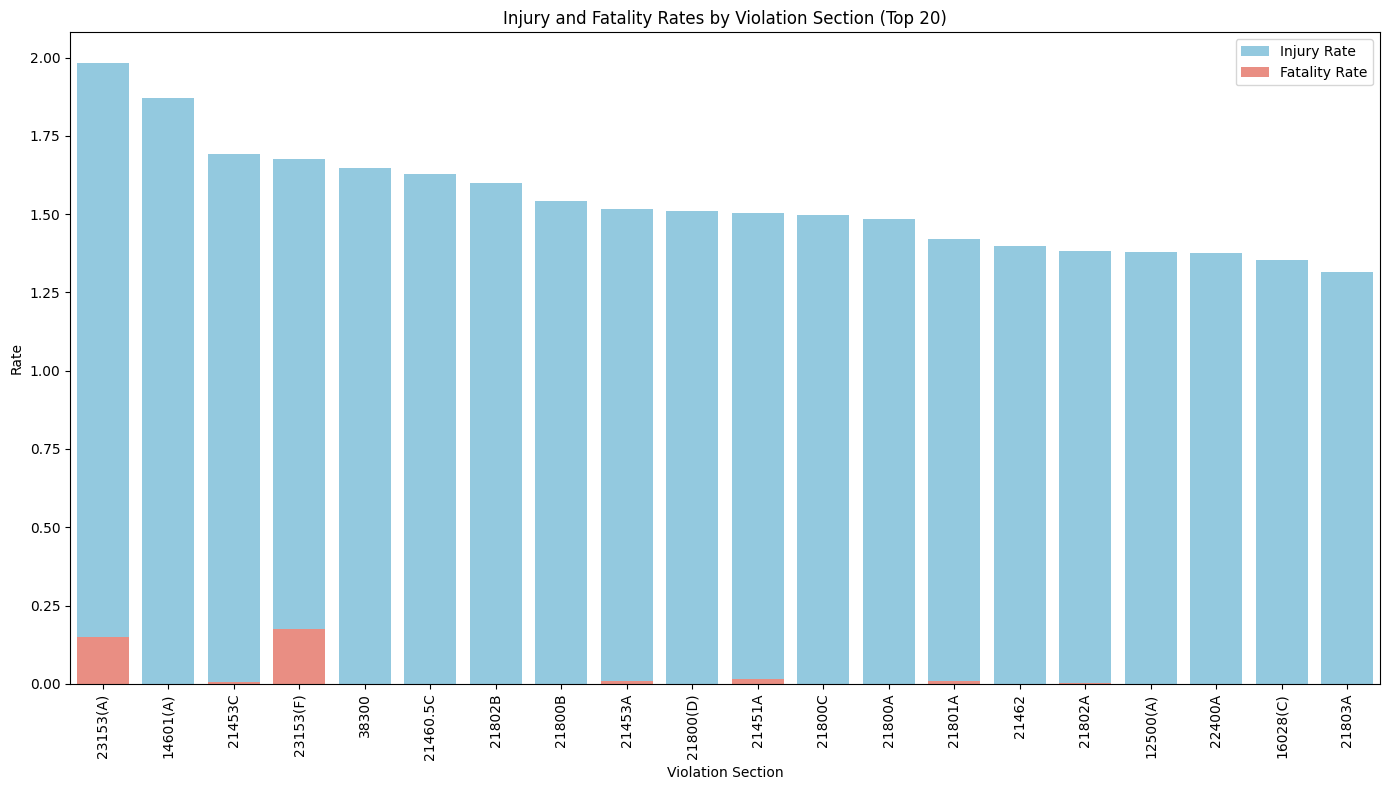

In [26]:
plt.figure(figsize=(14, 8))
sns.barplot(x='violation_section', y='injury_rate', data=violation_aggregated_filtered_sorted.head(20), color='skyblue', label='Injury Rate')
sns.barplot(x='violation_section', y='fatality_rate', data=violation_aggregated_filtered_sorted.head(20), color='salmon', label='Fatality Rate')
plt.title('Injury and Fatality Rates by Violation Section (Top 20)')
plt.xlabel('Violation Section')
plt.ylabel('Rate')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
vehicle_make_counts = data_filtered['veh_make'].value_counts()
vehicle_make_counts

veh_make
TOYOTA                  19548
HONDA                   13043
FORD                    12837
NISSAN                   8780
CHEVROLET                6940
                        ...  
KRYSTAL KOACH, INC.         1
INFINITY TRAILER SLS        1
EPIC                        1
VILLIERS                    1
HAPPY E-BIKE                1
Name: count, Length: 865, dtype: int64

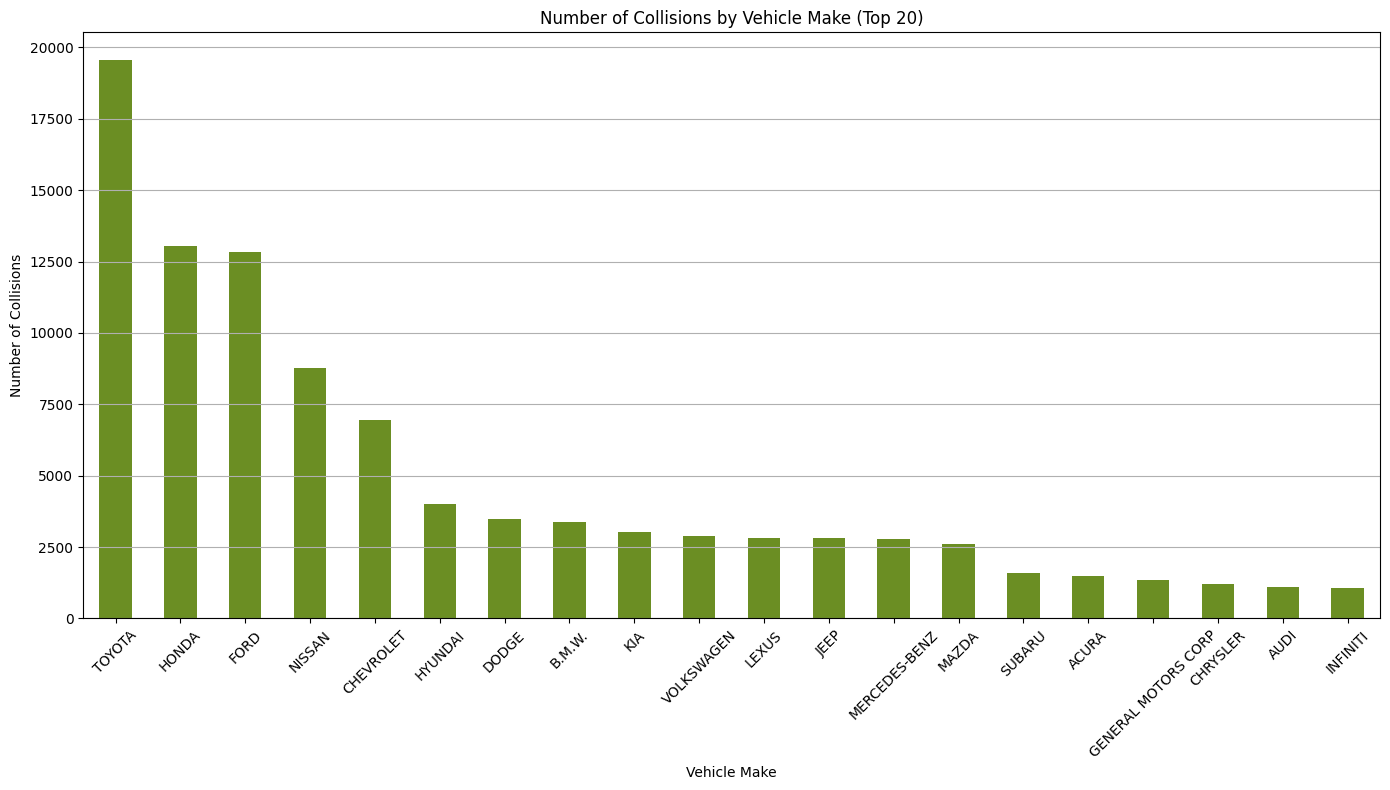

In [28]:
plt.figure(figsize=(14, 8))
vehicle_make_counts.head(20).plot(kind='bar', color='olivedrab')  # Displaying top 20 for clarity
plt.title('Number of Collisions by Vehicle Make (Top 20)')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
police_beat_file_path = 'pd_beat_codes_list_datasd.csv'
police_beat_data = pd.read_csv(police_beat_file_path)

data_filtered['police_beat'] = data_filtered['police_beat'].astype(str)
police_beat_data['beat'] = police_beat_data['beat'].astype(str)

In [30]:
merged_data = pd.merge(data_filtered, police_beat_data, left_on='police_beat', right_on='beat', how='left')
collision_counts = merged_data['neighborhood'].value_counts()

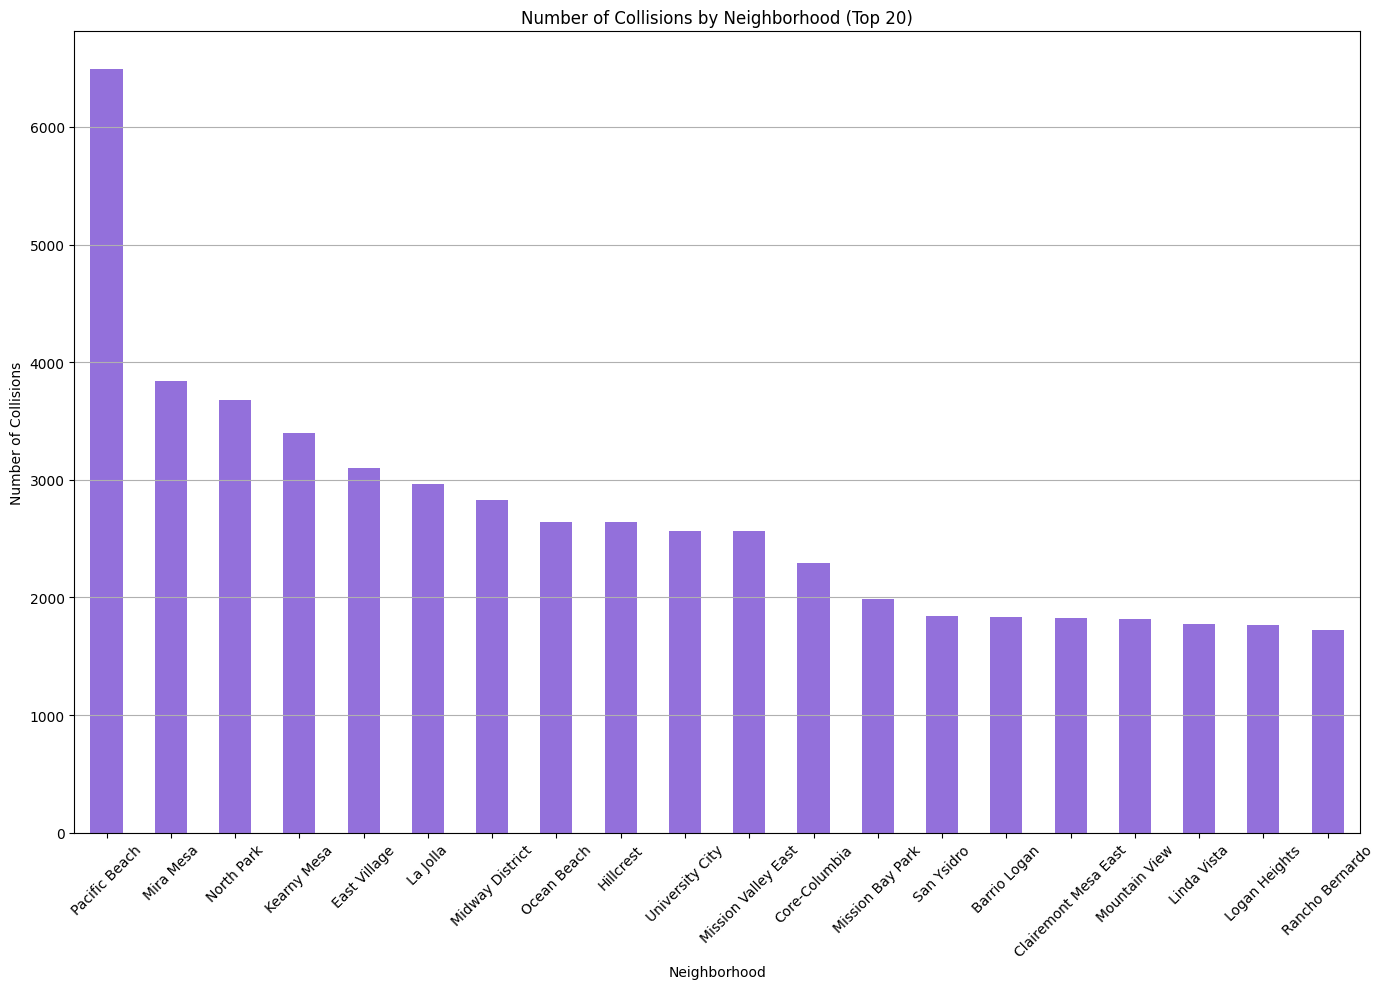

In [31]:
plt.figure(figsize=(14, 10))
collision_counts.head(20).plot(kind='bar', color='mediumpurple')  # Displaying top 20 for clarity
plt.title('Number of Collisions by Neighborhood (Top 20)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

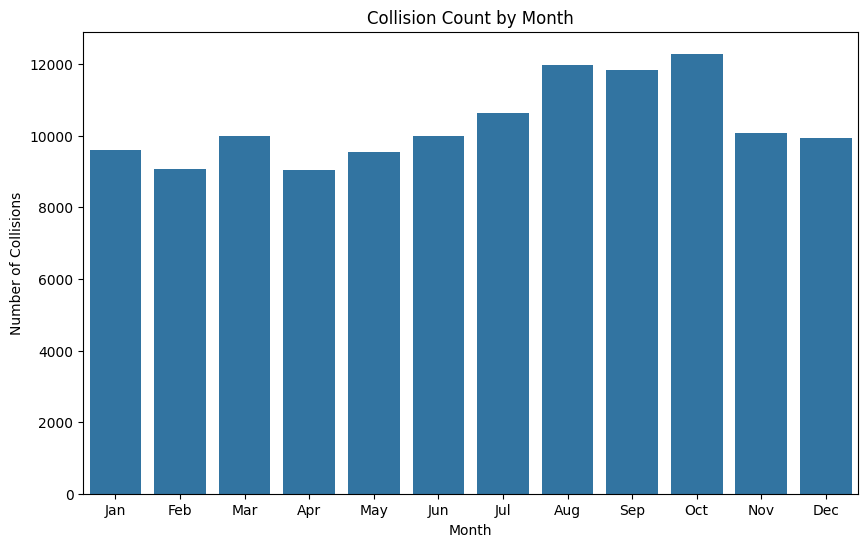

In [32]:
data['month'] = data['date_time'].dt.month
data['day_of_week'] = data['date_time'].dt.day_name()
data['hour'] = data['date_time'].dt.hour

month_counts = data['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, color='#1f77b4')
plt.title('Collision Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

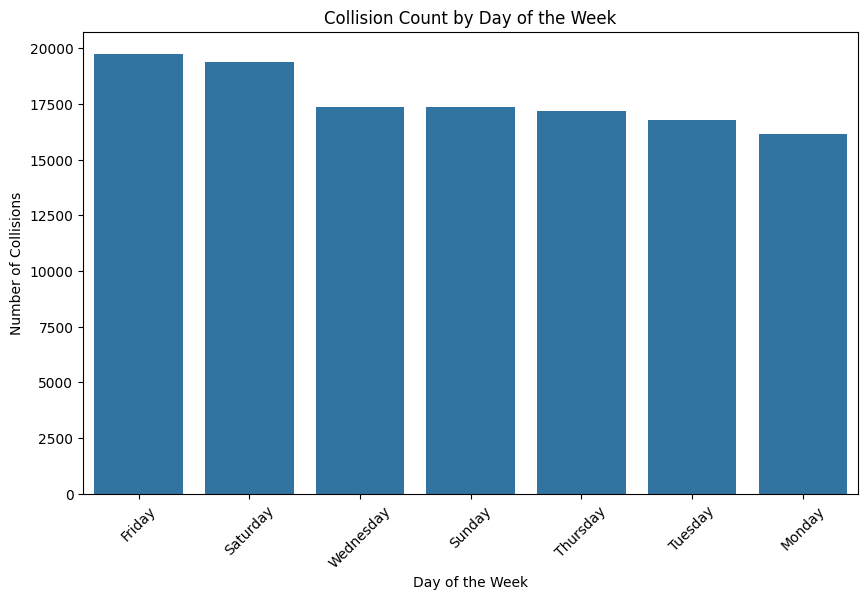

In [33]:
day_counts = data['day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, color='#1f77b4')  # Uniform color set
plt.title('Collision Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()

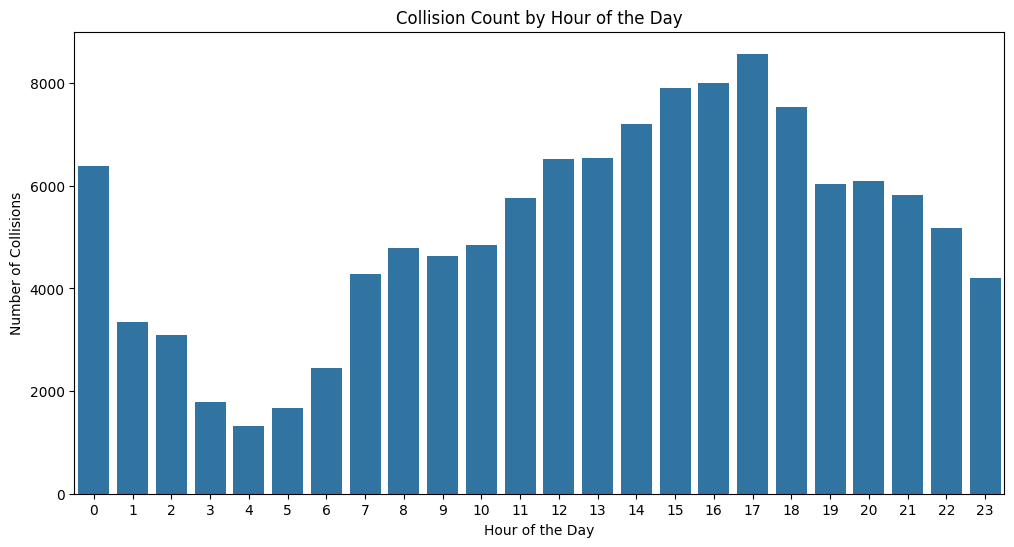

In [34]:
hour_counts = data['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='#1f77b4')  # Uniform color set
plt.title('Collision Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Collisions')
plt.xticks(range(24))
plt.show()

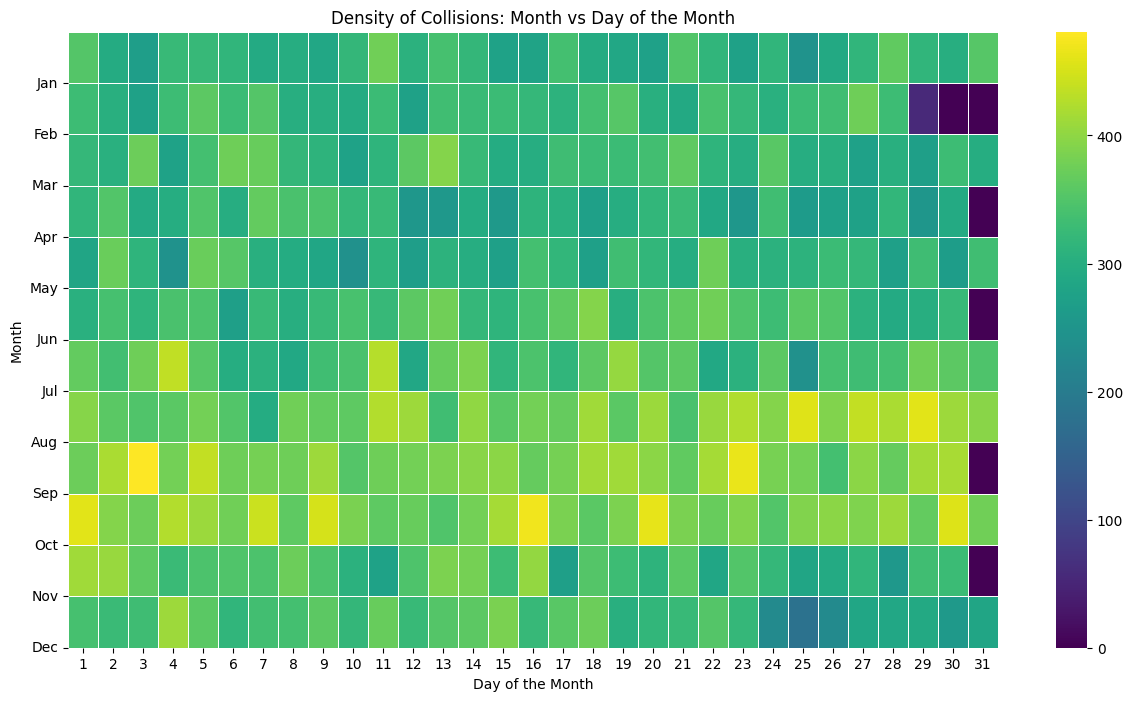

In [35]:
data['date_time'] = pd.to_datetime(data['date_time'], errors='coerce')
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
collision_heatmap_data = data.pivot_table(index='month', columns='day', aggfunc='size', fill_value=0)
plt.figure(figsize=(15, 8))
sns.heatmap(collision_heatmap_data, cmap='viridis', linewidths=.5)
plt.title('Density of Collisions: Month vs Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.yticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In [36]:
traffic_volume_data_path = 'traffic_counts_processed.csv' 
collision_data_path = 'pd_collisions_details_datasd.csv' 
collision_data = pd.read_csv(collision_data_path)
traffic_volume_data = pd.read_csv(traffic_volume_data_path)

C:\Users\oberm\AppData\Local\Temp\ipykernel_9260\2531128399.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_data = pd.read_csv(collision_data_path)


FileNotFoundError: [Errno 2] No such file or directory: 'traffic_counts_processed.csv'

In [ ]:
traffic_volume_data['date_count'] = pd.to_datetime(traffic_volume_data['date_count'])
latest_traffic_volume_data = traffic_volume_data.sort_values(by='date_count', ascending=False).drop_duplicates('street_name')
collision_data['accurate_street_name'] = collision_data['address_road_primary'] + ' ' + collision_data['address_sfx_primary']
collision_data['accurate_street_name'] = collision_data['accurate_street_name'].str.upper().str.strip()

In [ ]:
accurate_collision_counts = collision_data.groupby('accurate_street_name').size().reset_index(name='collision_count')
accurate_merged_data = pd.merge(accurate_collision_counts, latest_traffic_volume_data, left_on='accurate_street_name', right_on='street_name', how='inner')
accurate_merged_data['collision_rate'] = accurate_merged_data['collision_count'] / accurate_merged_data['total_count']

/var/folders/ld/npr6n3cj2vxbmgwd8y9mllgw0000gn/T/ipykernel_1869/2238595536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='collision_rate', y='accurate_street_name', data=top_streets, palette="Blues_d")


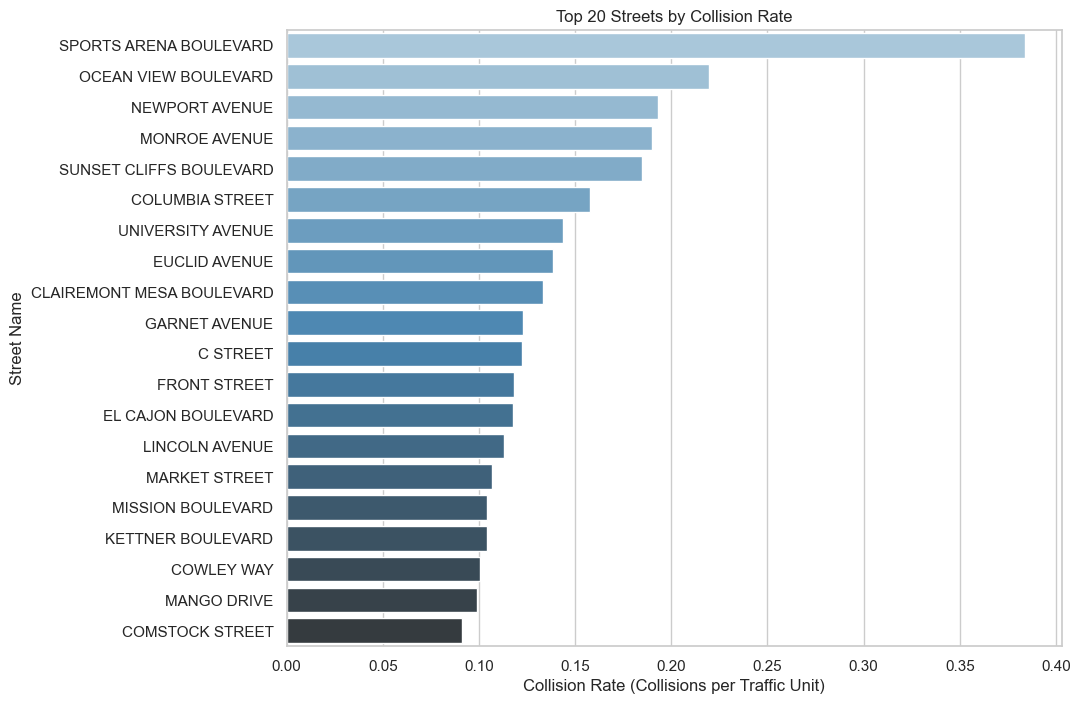

In [ ]:
sns.set(style="whitegrid")
top_n = 20
top_streets = accurate_merged_data.sort_values(by='collision_rate', ascending=False).head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(x='collision_rate', y='accurate_street_name', data=top_streets, palette="Blues_d")
plt.title(f'Top {top_n} Streets by Collision Rate')
plt.xlabel('Collision Rate (Collisions per Traffic Unit)')
plt.ylabel('Street Name')
plt.show()

In [ ]:
file_path = 'collision_reports_processed.csv'  
processed = pd.read_csv(file_path)
processed.head()

,date_time,year,month,day,hour_minute,person_role,veh_make,violation_section,violation_type,charge_desc,injured,killed,street_name_primary,street_name_intersecting
0,2015-01,2015,1,14,20:00,PARKED VEHICLE OCCUPANT,TOYOTA,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,JUNIPER STREET,NaN
1,2015-03,2015,3,19,12:00,PARKED VEHICLE OCCUPANT,FORD,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,LINDA VISTA ROAD,NaN
2,2015-03,2015,3,24,03:05,DRIVER,NISSAN,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,2,0,WASHINGTON STREET,NaN
3,2015-03,2015,3,27,23:56,DRIVER,FORD,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,WORDEN STREET,NaN
4,2015-07,2015,7,6,11:45,DRIVER,FORD,20002(A),VC,HIT AND RUN,0,0,EL CAJON BOULEVARD,NaN


In [ ]:
data.head()

,report_id,date_time,person_role,person_injury_lvl,person_veh_type,veh_type,veh_make,veh_model,police_beat,address_no_primary,...,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,month,day_of_week,hour,day
0,171111,2015-01-14 20:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,NaN,TOYOTA,RAV4,835,4200,...,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,1,Wednesday,20,14
1,192016,2015-03-19 12:00:00,PARKED VEHICLE OCCUPANT,NaN,NaN,AUTOMOBILE,FORD,NaN,622,5200,...,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,3,Thursday,12,19
2,190012,2015-03-24 03:05:00,DRIVER,VISABLE,NaN,NaN,NISSAN,ALTIMA,626,1000,...,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,2,0,NaN,3,Tuesday,3,24
3,191866,2015-03-27 23:56:00,DRIVER,PAIN,NaN,LIGHT DUTY TRUCK,FORD,F150,613,2800,...,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN,3,Friday,23,27
4,185207,2015-07-06 11:45:00,DRIVER,NaN,NaN,NaN,FORD,MUSTANG,813,2800,...,20002(A),VC,HIT AND RUN,0,0,MISDEMEANOR,7,Monday,11,6


In [ ]:
mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
month_hour = data.groupby(['month','hour']).count()['report_id']

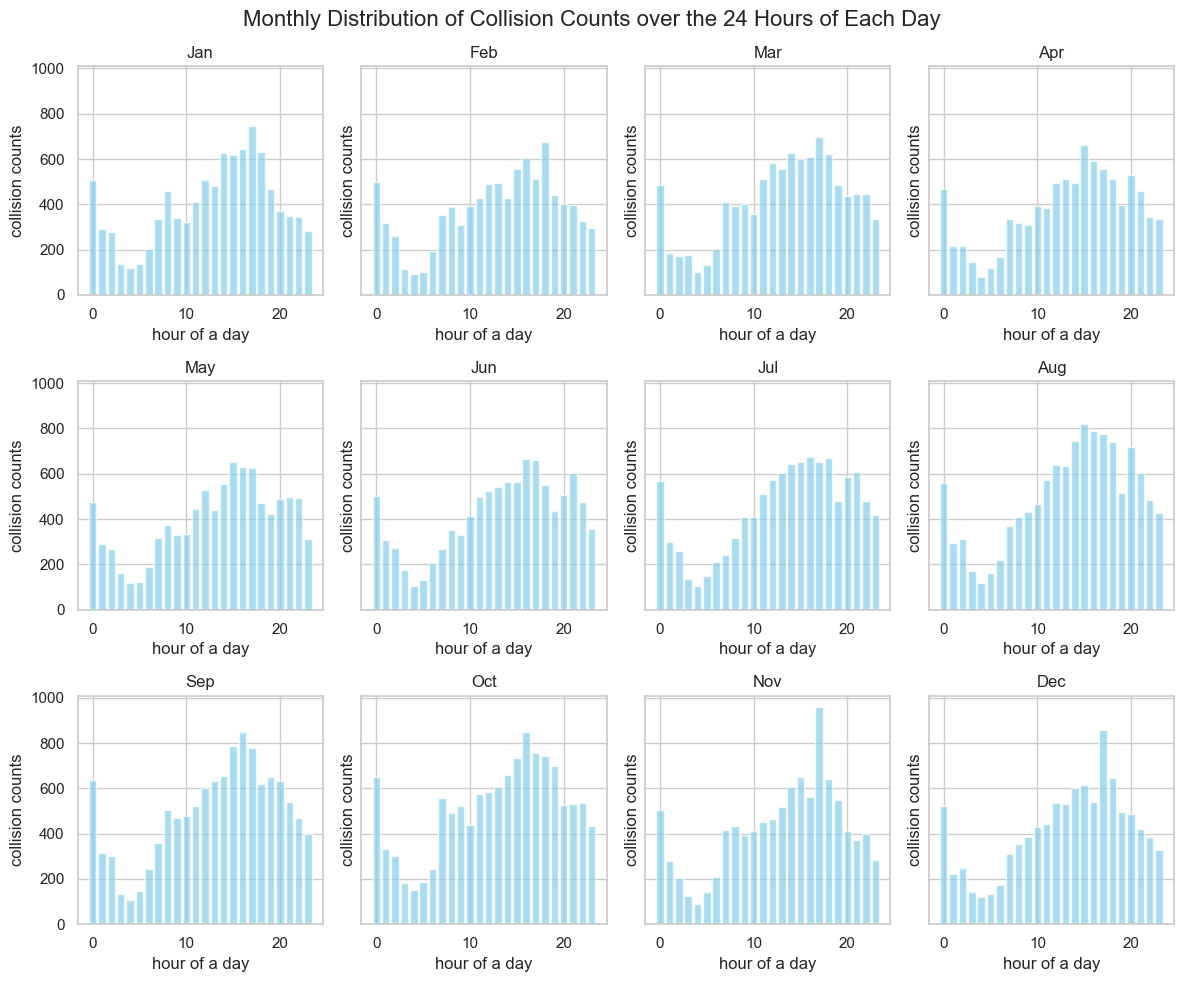

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 10), sharey=True)
for i in range(12):
        x = range(24)
        y = month_hour.loc[i + 1]
        
        axes[i // 4, i % 4].bar(x, y, color='skyblue', alpha=0.7)
        axes[i // 4, i % 4].set_title(mon[i])
        axes[i // 4, i % 4].set_xlabel('hour of a day')
        axes[i // 4, i % 4].set_ylabel('collision counts')
        

plt.suptitle('Monthly Distribution of Collision Counts over the 24 Hours of Each Day', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\oberm\AppData\Local\Temp\ipykernel_9260\3818208144.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')
C:\Users\oberm\AppData\Local\Temp\ipykernel_9260\3818208144.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_collisions_details_datasd.csv')


Mean Normalized Rate: 0.71
Standard Deviation of Normalized Rate: 0.24


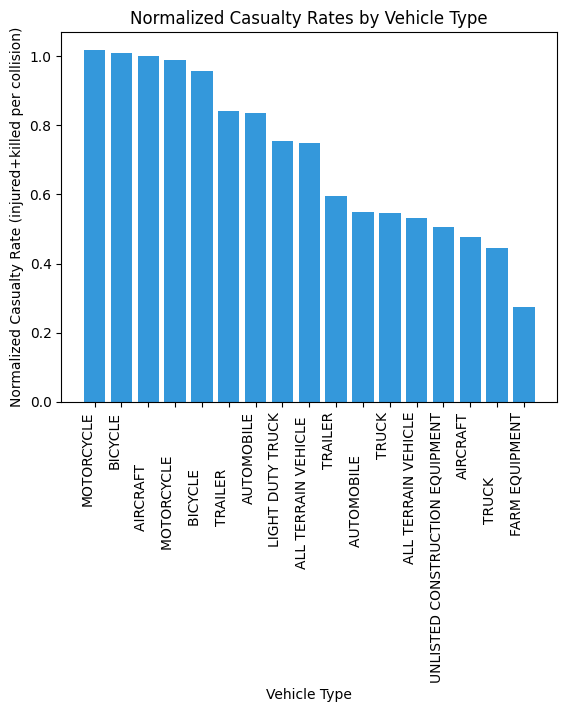

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = pd.read_csv('pd_collisions_details_datasd.csv')

# Dropping rows with veh type entry
df = df.dropna(subset = ['veh_type'])

df['casualty_total'] = df['injured'] + df['killed']
grouped_data = df.groupby('veh_type').agg({'casualty_total': 'sum', 'veh_type': 'count'})

grouped_data['normalized_rate'] = grouped_data['casualty_total'] / grouped_data['veh_type']
grouped_data = grouped_data.sort_values(by='normalized_rate', ascending=False)

# Display mean and standard deviation
mean_normalized_rate = grouped_data['normalized_rate'].mean()
std_normalized_rate = grouped_data['normalized_rate'].std()

print(f"Mean Normalized Rate: {mean_normalized_rate:.2f}")
print(f"Standard Deviation of Normalized Rate: {std_normalized_rate:.2f}")

bar_color = '#3498db'
fig, ax = plt.subplots()
ax.set_facecolor('white')
plt.bar(grouped_data.index, grouped_data['normalized_rate'], color = bar_color)
plt.xlabel('Vehicle Type')
plt.ylabel('Normalized Casualty Rate (injured+killed per collision)')
plt.title('Normalized Casualty Rates by Vehicle Type')
plt.xticks(rotation=90, ha='right')
plt.show()

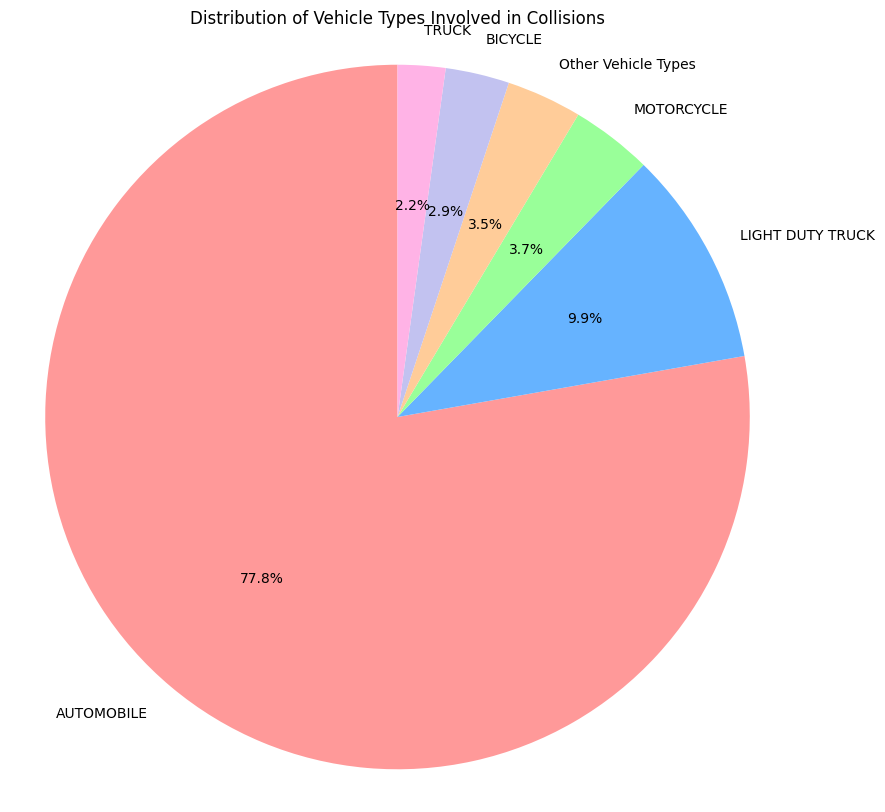

In [38]:
# Count the occurrences of each vehicle type
vehicle_counts = df['veh_type'].value_counts()

# Identify categories with less than 2 percent and group them into 'Other'
threshold = 0.02  # Threshold for grouping categories
small_categories = vehicle_counts[vehicle_counts / vehicle_counts.sum() < threshold].index

# Use .loc to replace values in the 'veh_type' column
df.loc[df['veh_type'].isin(small_categories), 'veh_type'] = 'Other Vehicle Types'

# Recalculate the counts after grouping small categories
vehicle_counts = df['veh_type'].value_counts()



fig, ax = plt.subplots(figsize=(10, 10))


fig.patch.set_facecolor('white')


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']


ax.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black'}, colors=colors)
ax.axis('equal')
ax.set_title('Distribution of Vehicle Types Involved in Collisions', color='black')

plt.show()